In [1]:
#import all the library
import pandas as pd
import glob
from scipy.stats import f_oneway
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [8]:
path = r'C:\Users\user\Desktop\Winter data\Winter ICA\feature\F3(com).csv' # use your path
df = pd.read_csv(path)# read the csv file
df


,Unnamed: 0,alpha_ey_cl,alpha_ey_op,alpha_ph1,alpha_ph2,beta_ey_cl,beta_ey_op,beta_ph1,beta_ph2,ch_name,sub ID
0,0,0.045668,0.056189,0.055882,0.054257,0.042522,0.040284,0.040915,0.039799,F3,131220191
1,0,0.075663,0.072504,0.067465,0.048454,0.035254,0.035487,0.036275,0.042190,F3,161220191
2,0,0.081143,0.040002,0.075550,0.066030,0.032171,0.043572,0.035119,0.037419,F3,161220192
3,0,0.088172,0.074270,0.031858,0.022743,0.031239,0.035793,0.047387,0.048411,F3,161220192


In [9]:
path1 = r'C:\Users\user\Desktop\Winter data\Winter ICA\feature\F4(com).csv' # use your path
df1 = pd.read_csv(path1)# read the csv file
df1


,Unnamed: 0,alpha_ey_cl,alpha_ey_op,alpha_ph1,alpha_ph2,beta_ey_cl,beta_ey_op,beta_ph1,beta_ph2,ch_name,sub ID
0,0,0.066656,0.045567,0.062819,0.054968,0.037849,0.043031,0.039243,0.040486,F4,131220191
1,0,0.069336,0.064732,0.059057,0.044730,0.036921,0.037863,0.039218,0.044096,F4,161220191
2,0,0.102565,0.055394,0.086876,0.082107,0.026701,0.040315,0.031590,0.032746,F4,161220192
3,0,0.071012,0.088396,0.042277,0.038261,0.035423,0.031478,0.043993,0.043958,F4,161220192


In [10]:
# Subtracting DataFrame2 from DataFrame1

eye_cl_s = df['alpha_ey_cl'] - df1['alpha_ey_cl']
phase1_s = df['alpha_ph1'] - df1['alpha_ph1']
phase2_s = df['alpha_ph2'] - df1['alpha_ph2']
eye_op_s = df['alpha_ey_op'] - df1['alpha_ey_op']


In [11]:
# add DataFrame2 from DataFrame1
eye_cl_a = df['alpha_ey_cl'] + df1['alpha_ey_cl']
phase1_a = df['alpha_ph1'] + df1['alpha_ph1']
phase2_a = df['alpha_ph2'] + df1['alpha_ph2']
eye_op_a = df['alpha_ey_op'] + df1['alpha_ey_op']


In [12]:
# power rattio
rt_eye_cl = eye_cl_s/eye_cl_a
rt_pha_1 = phase1_s/phase1_a 
rt_pha_2 = phase2_s/phase2_a
rt_eye_op = eye_op_s/eye_op_a


In [13]:
rt_pha_2

0   -0.006505
1    0.039962
2   -0.108532
3   -0.254384
Name: alpha_ph2, dtype: float64

In [14]:
p1 =pd.DataFrame(rt_eye_cl )
p2 =pd.DataFrame(rt_eye_op )
p3 =pd.DataFrame(rt_pha_1)
#p3 =pd.DataFrame(af_m2_rt)
p4 =pd.DataFrame(rt_pha_2)


In [15]:
power = pd.concat([p1,p2,p3,p4],axis=1, sort=False)
power['Subject'] = [1,2,3,4]  
power.set_index('Subject', inplace = True)
#power_2= pd.concat([p1,p2,p3,p4],axis=1, sort=False)
power

,alpha_ey_cl,alpha_ey_op,alpha_ph1,alpha_ph2
Subject,,,,
1,-0.186851,0.104388,-0.058441,-0.006505
2,0.043634,0.056634,0.066456,0.039962
3,-0.116609,-0.161342,-0.069726,-0.108532
4,0.107801,-0.086836,-0.140537,-0.254384


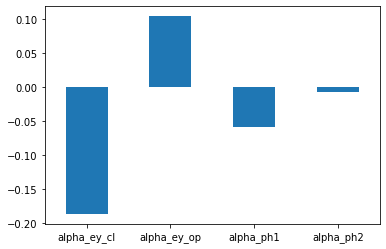

In [16]:
r1= power.iloc[0]
r1
r1.plot.bar(rot=0);

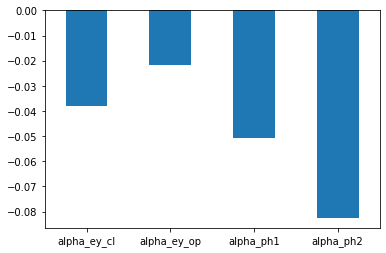

In [25]:
M=power.mean()
M.plot.bar(rot=0)

Text(0, 0.5, 'Power level')

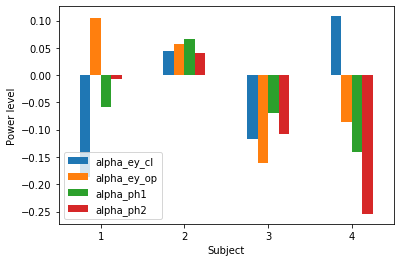

In [17]:
power.plot.bar(rot=0);
#plt.title('My title')
plt.xlabel('Subject')
plt.ylabel('Power level')

#plot.show(block=True);

In [ ]:
power.T.plot()#power.to_csv('C:/Users/user/Desktop/power.csv')

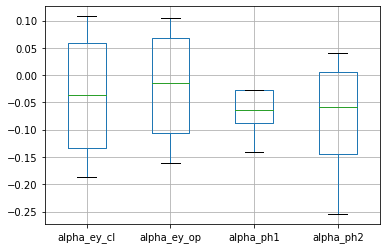

In [18]:

power.boxplot(column=['alpha_ey_cl','alpha_ey_op', 'alpha_ph1','alpha_ph2'],showfliers=False)

In [ ]:
 Mean =power.mean()

In [19]:
c1 = rt_pha_1 - rt_eye_cl
c2 = rt_pha_2 - rt_eye_cl
c3 = rt_eye_op - rt_eye_cl


In [20]:

d1 =pd.DataFrame(c1,columns = ['ph1'])
d2 =pd.DataFrame(c2,columns = ['ph2'])
d3 =pd.DataFrame(c3,columns = ['ey_op'])


In [21]:
result = pd.concat([d1,d2,d3],axis=1, sort=False)
result['Subject'] = [1,2,3,4]  
result.set_index('Subject', inplace = True)
result   

,ph1,ph2,ey_op
Subject,,,
1,0.128410,0.180346,0.291239
2,0.022822,-0.003672,0.012999
3,0.046883,0.008077,-0.044733
4,-0.248338,-0.362186,-0.194637


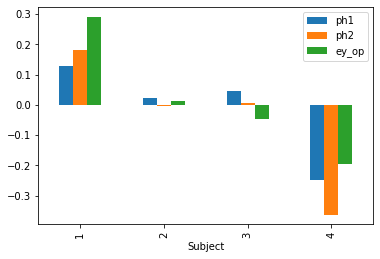

In [22]:

result.plot.bar();

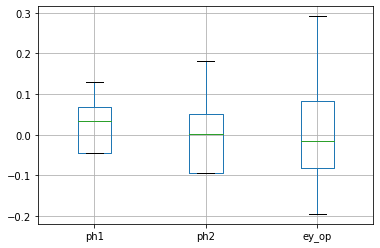

In [23]:

result.boxplot(column=['ph1','ph2', 'ey_op'],showfliers=False)

In [ ]:
import researchpy as rp

In [ ]:
s1=rp.summary_cont(power['alpha_ph1'])
s2=rp.summary_cont(power['alpha_ph2'])
s3=rp.summary_cont(power['alpha_ey_op'])
s4=rp.summary_cont(power['alpha_ey_cl'])

In [ ]:
print(s1,
      '-----------------')
print(s2,
      '-----------------')
print(s3,
      '-----------------')
print(s4)

In [ ]:
p1=rp.summary_cont(c1)
p2=rp.summary_cont(c2)
p3=rp.summary_cont(c3)
print(p1)

In [ ]:
from scipy.stats import f_oneway

F, p = f_oneway(rt_eye_cl, rt_eye_op, rt_pha_1)
print(F,p)

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

stat, p = wilcoxon(rt_eye_cl, rt_eye_op)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

In [ ]:
from scipy.stats import wilcoxon
w, p = wilcoxon(c3,alternative='greater')
#w, p = wilcoxon(c3)
print(w,p)

In [ ]:
from scipy import stats
ttest,pval = stats.ttest_rel(power['alpha_ey_cl'],power['alpha_ey_op'])
print('p-inter1',pval,'Stat-inter1',ttest)
#print('Stat',ttest)

In [ ]:
import statistics
print("\n----------- Calculate Mean -----------\n")
print(result.mean())
 
print("\n----------- Calculate Median -----------\n")
print(power.median())
2
print("\n----------- Calculate Mode -----------\n")
print(result.mode())

In [ ]:

fig, ax = plt.subplots()

power.T.plot(ax=ax,color='gray',legend=False)
mdian.plot(ax=ax,linewidth=5,color='red',style='.-')
#yerr.plot.area(ax=ax,color='gray')
#ax.fill_between(yerr,0)
Mean.plot(ax=ax,linewidth=1,color='blue',style='.-')
plt.xlabel('phase')
# Set the y axis label of the current axis.
plt.ylabel('emotion')
plt.grid(True)

In [ ]:
mean = power.mean()
mean.plot.area(stacked=False)

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

#sns.boxplot(x="variable", y="value", data=pd.melt(power))
sns.lineplot(data =power)


#plt.show()



In [ ]:
w, p = wilcoxon(c2,)
w
p

In [ ]:
import seaborn 
mean = power.T.mean(axis = 1)
std = power.T.std(axis = 1)

n= power.shape[1]
yerr = std / np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)


#seaborn.lineplot(power,y= mean,estimator='mean', ci=95)

In [ ]:
import PyNonpar

In [ ]:
PyNonpar.twosample.wilcoxon_mann_whitney_test(af_sk_rt, alternative="less", method = "exact", alpha = 0.05)

In [ ]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
df = pd.melt(frame = power,
             var_name = 'phase',
             value_name = 'Emotion')

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(ax = ax,
             data = df,
             x = 'phase',
             y = 'Emotion',ci=95)
plt.grid(True)
plt.show()

In [ ]:
fig, ax = plt.subplots()

power.T.plot(ax=ax,color='gray',legend=False)
mdian.plot(ax=ax,linewidth=5,color='red',legend=False)
sns.lineplot(ax = ax,
             data = df,
             x = 'phase',
             y = 'Emotion',ci=95,legend=False)
#yerr.plot.area(ax=ax,color='gray')
#ax.fill_between(yerr,0)
plt.xlabel('phase')
# Set the y axis label of the current axis.
plt.ylabel('emotion')
plt.grid(True,linestyle='--')
plt.gca()